<a href="https://colab.research.google.com/github/showboyz/data_study/blob/master/%EB%8C%93%EA%B8%80%EC%A0%84%EC%B2%98%EB%A6%AC_%ED%81%AC%EB%A1%A4%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
# 정규분포식 사용
import re
import matplotlib.pyplot as plt

%matplotlib inline
# 시각화 결과가 선명하게 표시
%config InlineBackend.figure_format = 'retina'

In [69]:
# 시각화를 위한 한글폰트 설정
# 맥 폰트설정
plt.rc("font", family ="AppleGothic")
plt.rc('axes', unicode_minus=False)


In [3]:
# 크롤링한 파일 로드
df = pd.read_csv("./drive/My Drive/Colab Notebooks/data/inflearn-event.csv")

In [4]:
df.shape

(2447, 1)

In [5]:
df.head()

,text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
2,2020년 목표 : 리액트 공부하기
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!


In [6]:
### 중복 입력 값 제거(빈도 수 중복을 방지하기 위해) 중복지우고 제일 마지막꺼 살림
df = df.drop_duplicates(["text"], keep="last")
df.shape

(2409, 1)

In [7]:
# 전저리 전에 원본을 보존하기 위해 복사해 둠
df["origin_text"] = df["text"]

In [8]:
df.head()

,text,origin_text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!
5,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!


In [9]:
### 대문자를 모두 소문자로 변경
df["text"] = df["text"].str.lower()

In [10]:
### 같은 의미의 단어를 하나로 통일 ( python -> 파이썬 )
df["text"] = df["text"].str.replace(
    "python", "파이썬").str.replace(
    "pandas", "판다스").str.replace(
    "javascript", "자바스크립트").str.replace(
    "java", "자바").str.replace(
    "react", "리액트")

In [11]:
### 관심강의 분리 (관심강의 뒤에 나온 강의 제목만 따로 분리)
df["course"] = df["text"].apply(lambda x: x.split('관심강의')[-1])
df["course"] = df["course"].apply(lambda x: x.split('관심 강의')[-1])
df["course"] = df["course"].apply(lambda x: x.split('관심 강좌')[-1])
df["course"] = df["course"].str.replace(":", "")
df["course"].head(30)

0     2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...
1     2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ...
3                   40대 프로그래밍 시작!  우리를 위한 프로그래밍  파이썬 중급
4                        2020년 목표  돌머리 비전공자가 멋진 전공자 되기!
5                      2020 년목표 비전공자(경영)가 전공자(it) 되기!!!
6                          2020년 목표  리액트 공부하기, 스프링 공부하기
7                                 리액트로 nodebird sns 만들기
8                                                   리액트
9          open cv ,  dl(tensorflow, keras, etc. ), nlp
10                                              선형대수학개론
11                                  2020년에는 대기업으로 이직하기!
12                                   2020년 목표  리액트 공부하기
13                                  윽 늦엇네욤 ㅋㅋ 2월부터 화이팅!
14                            2020년 크롤링, 시각화 열심히 하겠습니다!
15                      2020년에는 데이터를 좀 더 열심히 공부하려고 합니다.
16                                   2020년 목표 - 안주하지 않기
17           자바 공부 마스터 하고 싶습니다.   더 자바, 코드를 조작하는 다양한 방법
18                       파이썬 데이터시각화 분석 실전 프로젝트 수

In [12]:
df[["text", "course"]].tail()

,text,course
2442,"작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 jpa 강의를 또 스...",스프링 데이터 jpa
2443,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...,스프링 부트 개념과 활용
2444,"에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다...",에펙 초보자도 만들 수 있는 유튜브 인트로 에프터이펙트 강좌
2445,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...,파이썬 입문 및 웹 크롤링을 활용한 다양한 자동화 어플리케이션 제작하기
2446,인프런 0호 팀원이에요!\n그동안 서비스 개발 때문에 js 를 많이 했었는데 앞으론...,남박사의 파이썬 활용


In [13]:
# 띄어 쓰기를 제거한 텍스트에서 키워드 추출
search_keyword = ['머신러닝', '딥러닝', '파이썬', '공공데이터', 'django', '크롤링', '시각화',
                  '데이터분석', '웹개발', '엑셀', 'c', '자바', '자바스크립트',
                  'node', 'vue', '리액트']

# keyword 컬럼을 만들어서 문장에 키워드가 들어가면 true -> 빈도수 추출을 위해
for keyword in search_keyword:
    df[keyword] = df['course'].str.contains(keyword)

In [14]:
df.head()

,text,origin_text,course,머신러닝,딥러닝,파이썬,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는...","2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ...",False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 돌머리 비전공자가 멋진 전공자 되기!,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표 비전공자(경영)가 전공자(it) 되기!!!,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df_python = df[df['text'].str.contains('파이썬|공공데이터|판다스')].copy()
df_python.shape

(430, 19)

In [16]:
### 키워드 빈도수 ### python 에서 true 값은 = 1, false = 0
df[search_keyword].sum()

머신러닝      133
딥러닝        53
파이썬       406
공공데이터      12
django     31
크롤링        56
시각화        30
데이터분석      24
웹개발        27
엑셀         18
c         410
자바        341
자바스크립트    140
node      117
vue       132
리액트       137
dtype: int64

In [17]:
# 정렬
df[search_keyword].sum().sort_values(ascending=False)

c         410
파이썬       406
자바        341
자바스크립트    140
리액트       137
머신러닝      133
vue       132
node      117
크롤링        56
딥러닝        53
django     31
시각화        30
웹개발        27
데이터분석      24
엑셀         18
공공데이터      12
dtype: int64

In [18]:
# 공공데이터가 들어가는 글들만 가져오기
text = df.loc[(df['공공데이터'] == True), 'text']
for t in text:
    print('-'*100)
    print(t)

----------------------------------------------------------------------------------------------------
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
파이썬의 고수가 되고싶어요
----------------------------------------------------------------------------------------------------
자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 파이썬이 궁금합니다.
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
----------------------------------------------------------------------------------------------------
올해 안에 원하는 공부 다 끝내보려고요. 내년이면 수능이라..

#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
----------------------------------------------------------------------------------------------------
it개발자입니다. 개발을 오래 안하고 관리만 했더니 다시 개발이 너무 하고싶습니다. 올해는 인프런을 통해서 개발쪽 스킬셋을 업그레이드 하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
----------------------------------------------------------------------------------------------------
파이썬 데이터분석 마스터
#관심강의:공공데이터로 파이썬 데이터 분석 시작하기
----------------------------------------------------------------------------------------------------
올해 졸업하는 컴퓨터공

In [19]:
### react 들어가는 텍스트만 찾기
df.loc[df["리액트"] == True, "course"].head(10)

6                          2020년 목표  리액트 공부하기, 스프링 공부하기
7                                 리액트로 nodebird sns 만들기
8                                                   리액트
12                                   2020년 목표  리액트 공부하기
23                                리액트로 nodebird sns 만들기
27                                리액트로 nodebird sns 만들기
41    웹기반 솔루션 개발자입니다.\n\n항상 업무관련된 일만 하다보니 기술적으로 정체되어...
49                                리액트로 nodebird sns 만들기
60                          리액트 / angular / 자바 / docker
63                                            리액트 & vue
Name: course, dtype: object

In [20]:
############# 입력한 시간 컬럼 추갛하기 ##################

In [21]:
############ 빈도수 계산을 위한 텍스트 데이터 벡터화 ###############

In [22]:
#토큰화
#ngram_range=(3,6) -> 3이면 파이썬 데이터 분석까지 묶어줌
"파이썬 데이터 분석".split()

['파이썬', '데이터', '분석']

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                                        tokenizer = None, #토크나이저를 따로 지정해 줄 수도 있습니다.
                                        preprocessor = None, # 전처리 도구
                                        stop_words = None, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                                        min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어
                                        ngram_range=(3, 6), # BOW의 잔위 갯수의 범위를 지정합니다.
                                        max_features = 3000 # 만들 피처의 수, 단어의 수
                                        )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=3000, min_df=2,
                ngram_range=(3, 6), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [24]:
feature_vector = vectorizer.fit_transform(df['course'])
feature_vector.shape

(2409, 2333)

In [25]:
#get_feature_names() 단어목록을 가져옴
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

2333


['12개 만들면서 배우는',
 '12개 만들면서 배우는 ios',
 '12개 만들면서 배우는 ios 아이폰',
 '12개 만들면서 배우는 ios 아이폰 개발',
 '12개를 만들며 배우는',
 '12개를 만들며 배우는 swift4',
 '12개를 만들며 배우는 swift4 ios11',
 '12개를 만들며 배우는 swift4 ios11 아이폰',
 '2018 do it',
 '2018 do it 안드로이드']

In [26]:
#dataframe 형태로 만들어줌 목록 빈도수 0은 등장하지않음
pd.DataFrame(feature_vector[:10].toarray(), columns=vocab).head()

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,2018 do it 안드로이드 프로그래밍,2020년 공부 목표,2020년 공부 목표 올해는,2020년 공부 목표 파이썬,2020년 공부 목표 프론트엔드,2020년 공부 목표 프론트엔드 영역,2020년 공부 목표 프론트엔드 영역 자유롭게,2020년 공부 목표 현재,2020년 공부 목표는,2020년 목표 리액트,2020년 목표 리액트 공부하기,2020년 목표 열심히,2020년 목표 열심히 공부해서,2d 시작부터 배포까지,3dsmax 초급부터 전문가까지,3dsmax 초급부터 전문가까지 한방에,3dsmax 초급부터 전문가까지 한방에 끝내는,3dsmax 초급부터 전문가까지 한방에 끝내는 3dsmax,age of vue,age of vue js,age of vue js vue,age of vue js vue js,android pie app,android pie app 개발,android pie app 개발 기본,android pie app 개발 심화,api 개발 스프링,api 개발 스프링 데이터,api 개발 스프링 데이터 jpa,api 개발 스프링 시큐리티,...,홍정모의 게임 만들기 연습,홍정모의 게임 만들기 연습 문제,홍정모의 게임 만들기 연습 문제 패키지,홍정모의 따라하며 배우는,홍정모의 따라하며 배우는 c언어,홍정모의 따라하며 배우는 c언어 홍정모의,홍정모의 따라하며 배우는 c언어 홍정모의 따라하며,홍정모의 따라하며 배우는 리눅스,홍정모의 따라하며 배우는 리눅스 시스템,홍정모의 따라하며 배우는 홍정모의,홍정모의 따라하며 배우는 홍정모의 게임,홍정모의 따라하며 배우는 홍정모의 게임 만들기,홍정모의 따라하며 배우는 홍정모의 따라하며,홍정모의 따라하며 배우는 홍정모의 따라하며 배우는,홍정모의 따라하면서 배우는,홍정모의 따라하면서 배우는 c언어,화이트해커가 되기 위한,화이트해커가 되기 위한 모의해킹,화이트해커가 되기 위한 모의해킹 완전,화이트해커가 되기 위한 모의해킹 완전 정복,활용 스프링 시큐리티,활용 스프링 프레임워크,활용1 애플리케이션 개발,활용1 애플리케이션 개발 실전,활용1 애플리케이션 개발 실전 스프링,활용1 애플리케이션 개발 실전 스프링 부트와,활용2 api 개발과,활용2 api 개발과 성능,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍,활용한 파이썬 프로그래밍 완벽,활용한 파이썬 프로그래밍 완벽 이해
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# sum을 이용해서 단어벡터를 더하면 빈도수를 알 수 있습니다.
# bag of words 에 몇 개의 단어가 들어있는지 확인
dist = np.sum(feature_vector, axis=0)
df_freq = pd.DataFrame(dist, columns=vocab)
df_freq

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,2018 do it 안드로이드 프로그래밍,2020년 공부 목표,2020년 공부 목표 올해는,2020년 공부 목표 파이썬,2020년 공부 목표 프론트엔드,2020년 공부 목표 프론트엔드 영역,2020년 공부 목표 프론트엔드 영역 자유롭게,2020년 공부 목표 현재,2020년 공부 목표는,2020년 목표 리액트,2020년 목표 리액트 공부하기,2020년 목표 열심히,2020년 목표 열심히 공부해서,2d 시작부터 배포까지,3dsmax 초급부터 전문가까지,3dsmax 초급부터 전문가까지 한방에,3dsmax 초급부터 전문가까지 한방에 끝내는,3dsmax 초급부터 전문가까지 한방에 끝내는 3dsmax,age of vue,age of vue js,age of vue js vue,age of vue js vue js,android pie app,android pie app 개발,android pie app 개발 기본,android pie app 개발 심화,api 개발 스프링,api 개발 스프링 데이터,api 개발 스프링 데이터 jpa,api 개발 스프링 시큐리티,...,홍정모의 게임 만들기 연습,홍정모의 게임 만들기 연습 문제,홍정모의 게임 만들기 연습 문제 패키지,홍정모의 따라하며 배우는,홍정모의 따라하며 배우는 c언어,홍정모의 따라하며 배우는 c언어 홍정모의,홍정모의 따라하며 배우는 c언어 홍정모의 따라하며,홍정모의 따라하며 배우는 리눅스,홍정모의 따라하며 배우는 리눅스 시스템,홍정모의 따라하며 배우는 홍정모의,홍정모의 따라하며 배우는 홍정모의 게임,홍정모의 따라하며 배우는 홍정모의 게임 만들기,홍정모의 따라하며 배우는 홍정모의 따라하며,홍정모의 따라하며 배우는 홍정모의 따라하며 배우는,홍정모의 따라하면서 배우는,홍정모의 따라하면서 배우는 c언어,화이트해커가 되기 위한,화이트해커가 되기 위한 모의해킹,화이트해커가 되기 위한 모의해킹 완전,화이트해커가 되기 위한 모의해킹 완전 정복,활용 스프링 시큐리티,활용 스프링 프레임워크,활용1 애플리케이션 개발,활용1 애플리케이션 개발 실전,활용1 애플리케이션 개발 실전 스프링,활용1 애플리케이션 개발 실전 스프링 부트와,활용2 api 개발과,활용2 api 개발과 성능,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍,활용한 파이썬 프로그래밍 완벽,활용한 파이썬 프로그래밍 완벽 이해
0,2,2,2,2,2,2,2,2,2,2,2,47,2,2,2,2,2,3,4,2,2,2,2,3,8,8,8,7,15,15,6,6,6,6,2,2,7,2,2,4,...,11,11,11,100,22,3,3,2,2,12,5,5,7,7,5,3,4,3,3,3,3,3,24,4,3,3,16,16,16,13,13,12,2,8,8,2,2,2,2,2


In [28]:
# 행과 열 축 바꿔줌 T 이용
df_freq.T.sort_values(by=0, ascending=False).head(10)

,0
홍정모의 따라하며 배우는,100
스프링 데이터 jpa,60
nodebird sns 만들기,60
머신러닝 완벽 가이드,49
리액트로 nodebird sns 만들기,49
파이썬 머신러닝 완벽,49
리액트로 nodebird sns,49
파이썬 머신러닝 완벽 가이드,48
프로그래밍과 자바스크립트 es6,48
함수형 프로그래밍과 자바스크립트,47


In [29]:
# TF-IDF 로 가중치를 줘서 벡터화 
# TF-IDF 불러오기
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False, use_idf=True)

In [30]:
%%time
feature_tfidf = transformer.fit_transform(feature_vector)
feature_tfidf.shape

CPU times: user 5.46 ms, sys: 0 ns, total: 5.46 ms
Wall time: 17.2 ms


In [31]:
# 가중치를 두고 다시 벡터를 구함
feature_tfidf

<2409x2333 sparse matrix of type '<class 'numpy.float64'>'
	with 12217 stored elements in Compressed Sparse Row format>

In [32]:
# 가중치를 준 벡터 미리보기
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns=vocab)
tfidf_freq.head()

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,2018 do it 안드로이드 프로그래밍,2020년 공부 목표,2020년 공부 목표 올해는,2020년 공부 목표 파이썬,2020년 공부 목표 프론트엔드,2020년 공부 목표 프론트엔드 영역,2020년 공부 목표 프론트엔드 영역 자유롭게,2020년 공부 목표 현재,2020년 공부 목표는,2020년 목표 리액트,2020년 목표 리액트 공부하기,2020년 목표 열심히,2020년 목표 열심히 공부해서,2d 시작부터 배포까지,3dsmax 초급부터 전문가까지,3dsmax 초급부터 전문가까지 한방에,3dsmax 초급부터 전문가까지 한방에 끝내는,3dsmax 초급부터 전문가까지 한방에 끝내는 3dsmax,age of vue,age of vue js,age of vue js vue,age of vue js vue js,android pie app,android pie app 개발,android pie app 개발 기본,android pie app 개발 심화,api 개발 스프링,api 개발 스프링 데이터,api 개발 스프링 데이터 jpa,api 개발 스프링 시큐리티,...,홍정모의 게임 만들기 연습,홍정모의 게임 만들기 연습 문제,홍정모의 게임 만들기 연습 문제 패키지,홍정모의 따라하며 배우는,홍정모의 따라하며 배우는 c언어,홍정모의 따라하며 배우는 c언어 홍정모의,홍정모의 따라하며 배우는 c언어 홍정모의 따라하며,홍정모의 따라하며 배우는 리눅스,홍정모의 따라하며 배우는 리눅스 시스템,홍정모의 따라하며 배우는 홍정모의,홍정모의 따라하며 배우는 홍정모의 게임,홍정모의 따라하며 배우는 홍정모의 게임 만들기,홍정모의 따라하며 배우는 홍정모의 따라하며,홍정모의 따라하며 배우는 홍정모의 따라하며 배우는,홍정모의 따라하면서 배우는,홍정모의 따라하면서 배우는 c언어,화이트해커가 되기 위한,화이트해커가 되기 위한 모의해킹,화이트해커가 되기 위한 모의해킹 완전,화이트해커가 되기 위한 모의해킹 완전 정복,활용 스프링 시큐리티,활용 스프링 프레임워크,활용1 애플리케이션 개발,활용1 애플리케이션 개발 실전,활용1 애플리케이션 개발 실전 스프링,활용1 애플리케이션 개발 실전 스프링 부트와,활용2 api 개발과,활용2 api 개발과 성능,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍,활용한 파이썬 프로그래밍 완벽,활용한 파이썬 프로그래밍 완벽 이해
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57735,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf.top = df_tfidf.sort_values(by=0, ascending=False)
df_tfidf.top.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,0
홍정모의 따라하며 배우는,66.358680
스프링 데이터 jpa,35.431160
nodebird sns 만들기,26.772590
리액트로 nodebird sns,24.149479
리액트로 nodebird sns 만들기,24.149479


In [35]:
# 중간에 생략되는 단어를 자세히 보고자 할 때
for t in df_tfidf.top.index[:50]:
  print(t)

홍정모의 따라하며 배우는
스프링 데이터 jpa
nodebird sns 만들기
리액트로 nodebird sns
리액트로 nodebird sns 만들기
파이썬 머신러닝 완벽
머신러닝 완벽 가이드
파이썬 머신러닝 완벽 가이드
프로그래밍과 자바스크립트 es6
함수형 프로그래밍과 자바스크립트 es6
함수형 프로그래밍과 자바스크립트
부트 개념과 활용
스프링 부트 개념과
스프링 부트 개념과 활용
실전 스프링 데이터
실전 스프링 데이터 jpa
2020년 공부 목표
따라하며 배우는 c언어
홍정모의 따라하며 배우는 c언어
파이썬 실전 100
남박사의 파이썬 실전 100 활용
파이썬 실전 100 활용
남박사의 파이썬 실전 100
남박사의 파이썬 실전
실전 100 활용
파이썬 머신러닝 완벽가이드
관심있는 인프런 강의명
rest api 개발
대세는 쿠버네티스 기초편
스프링부트 개념과 활용
orm 표준 jpa 프로그래밍
orm 표준 jpa
표준 jpa 프로그래밍
스프링 기반 rest api
스프링 기반 rest
스프링 기반 rest api 개발
기반 rest api
기반 rest api 개발
자바 orm 표준 jpa
자바 orm 표준 jpa 프로그래밍
자바 orm 표준
vue js 완벽 가이드
js 완벽 가이드
vue js 완벽
애플리케이션을 테스트하는 다양한
자바 애플리케이션을 테스트하는 다양한
자바 애플리케이션을 테스트하는
파이썬 알고리즘 문제풀이
테스트하는 다양한 방법
애플리케이션을 테스트하는 다양한 방법


In [36]:
################ 비지도 학습을 통해 비슷한 단어 끼리 군집화 = Cluster ################ kMeans 알고리즘 / minibatchMeans
from sklearn.cluster import KMeans
from tqdm import trange
inertia = []

start = 10
end = 50

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
for i in trange(start, end):
  cls = KMeans(n_clusters=i, random_state=42)
  cls.fit(feature_vector)
  inertia.append(cls.inertia_)

100%|██████████| 40/40 [00:52<00:00,  1.31s/it]


Text(0.5, 1.0, 'KMeans compare to cluster')

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


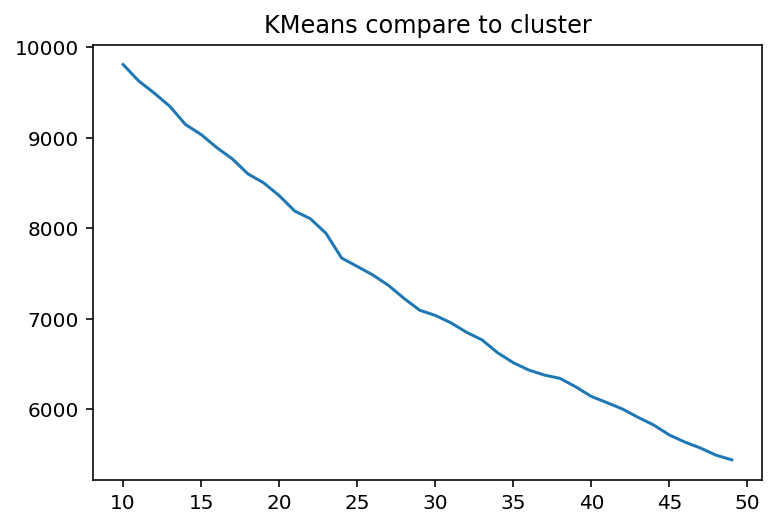

In [37]:
plt.plot(range(start, end), inertia)
plt.title('KMeans compare to cluster')

In [38]:
# 50개 정도 넣어줘야 응집도가 높다 

In [39]:
n_clusters = 30
cls = KMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df['cluster'] = predict

In [40]:
df['cluster'].value_counts().head(10)

3     1894
0       85
13      43
8       33
4       30
15      30
24      30
10      29
27      24
22      21
Name: cluster, dtype: int64

In [41]:
# 3번은 군집화가 제대로 안됨

In [42]:
# batch_size 를 쓸 수 있는 minibatichKMeans로 군집화
from sklearn.cluster import MiniBatchKMeans
b_inertia = []

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
for i in trange(start, end):
  cls = MiniBatchKMeans(n_clusters=i, random_state=42)
  cls.fit(feature_vector)
  b_inertia.append(cls.inertia_)

100%|██████████| 40/40 [00:04<00:00,  9.92it/s]


Text(0.5, 1.0, 'Compare to cluster by MinibatchKMeans')

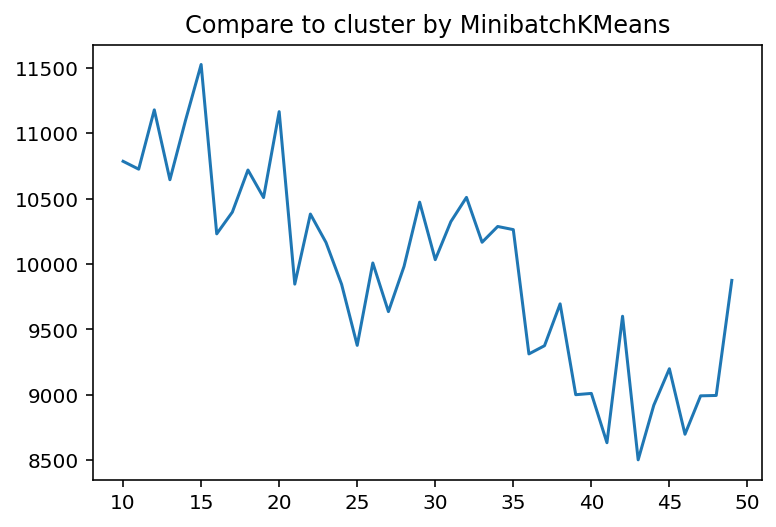

In [43]:
plt.plot(range(start, end), b_inertia)
plt.title("Compare to cluster by MinibatchKMeans")

In [44]:
cls = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df['bcluster'] = predict

In [45]:
df['bcluster'].value_counts()

22    1344
0      503
1       57
28      48
23      48
4       43
2       35
15      35
18      34
13      33
10      33
29      31
12      28
25      20
21      18
3       17
17      17
6       11
26      10
16       9
7        7
8        6
24       5
9        4
19       3
20       3
14       3
5        2
27       1
11       1
Name: bcluster, dtype: int64

In [49]:
df[df['bcluster'] == 28].head()

,text,origin_text,course,머신러닝,딥러닝,파이썬,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트,cluster,bcluster
7,2020년에는 아이티 마스터가 되기 관심강의 리액트\n#관심강의 : 리액트로 nod...,2020년에는 아이티 마스터가 되기 관심강의 리액트\n#관심강의 : React로 N...,리액트로 nodebird sns 만들기,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,13,28
23,next.js로 서버사이드 렌더링에 익숙해지고싶네요. \n#관심강의 : 리액트로 ...,Next.js로 서버사이드 렌더링에 익숙해지고싶네요. \n#관심강의 : React...,리액트로 nodebird sns 만들기,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,13,28
27,개발자로서 한 층 더 성장하고 싶습니다.\n#관심강의 : 리액트로 nodebird ...,개발자로서 한 층 더 성장하고 싶습니다.\n#관심강의 : React로 NodeBir...,리액트로 nodebird sns 만들기,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,13,28
49,프론트엔드 개발자입니다. 리액트 관심 있어요!\n#관심강의 : 리액트로 nodebi...,프론트엔드 개발자입니다. 리액트 관심 있어요!\n#관심강의 : React로 Node...,리액트로 nodebird sns 만들기,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,13,28
66,next.js로 서버사이드 렌더링에 익숙해지고싶네요.\n\n#관심강의 : 리액트로 ...,Next.js로 서버사이드 렌더링에 익숙해지고싶네요.\n\n#관심강의 : React...,리액트로 nodebird sns 만들기,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,13,28


In [54]:
df.loc[df['bcluster'] == 28, ['bcluster', 'cluster', 'course']].head(10)

,bcluster,cluster,course
7,28,13,리액트로 nodebird sns 만들기
23,28,13,리액트로 nodebird sns 만들기
27,28,13,리액트로 nodebird sns 만들기
49,28,13,리액트로 nodebird sns 만들기
66,28,13,리액트로 nodebird sns 만들기
133,28,13,서버 개발 지겨워서 프론트 개발로 갑니다! 2020년에는 프론트 개발로 통장에 돈 ...
145,28,13,리액트로 nodebird sns 만들기
174,28,13,리액트로 nodebird sns 만들기
193,28,13,리액트로 nodebird sns 만들기
214,28,13,리액트로 nodebird sns 만들기


In [56]:
df.loc[df['bcluster'] == 1, ['bcluster', 'cluster', 'course']].head(10)

,bcluster,cluster,course
25,1,3,"프로그래밍 시작하기 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기\n파..."
29,1,3,"프로그래밍 시작하기 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기"
52,1,3,공공데이터로 파이썬 데이터 분석 시작하기
68,1,3,[연재할인]제주코딩베이스캠프 code festival 자바스크립트 100제
71,1,3,프론트엔드 개발자로써 트렌드 기술 스택을 쌓고 싶어요! #웹게임을 만들며 배우는 t...
92,1,3,공공데이터로 파이썬 데이터 분석 시작하기
97,1,3,"파이썬, 데이터 분석, 머신러닝"
128,1,3,타입스크립트 기초를 탄탄하게!\n웹 게임을 만들며 배우는 typescript
213,1,3,웹게임을 만들며 배우는 typescript
227,1,3,js를 잘 다루고 싶습니다.\n\n#관심상의 웹게임을 만들며 배우는 typescript


In [83]:
########  WordCloud ###########
from wordcloud import WordCloud

# 불용어 - 자주 등장ㅎ하지만 의미가 크지 않아 제외하고 싶은 텍스트
stopwords = ['관심 강의', '관심강의', '관심', '강의', '강좌', '강의를', '올해', '올해는', '열심히', '공부를', '합니다', '하고', '싶어요',
'있는', '있습니다', '싶습니다', '2020년']

# 불용어를 제거하지 않고 그리려면 아래 주석을 풀어서 stopword 변수에 덮어쓰기
#stopwords = []
def displayWordCloud(data = None, backgroundcolor = 'white', width=1280, height=768):
  wordcloud = WordCloud(
      # 한글 폰트 설정 해줘야함
      font_path = './drive/My Drive/Colab Notebooks/data/NanumBarunGothic.ttf',
      stopwords = stopwords,
      background_color = backgroundcolor,
      width = width, height = height).generate(data)
  plt.figure(figsize =  (15 , 10))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
  

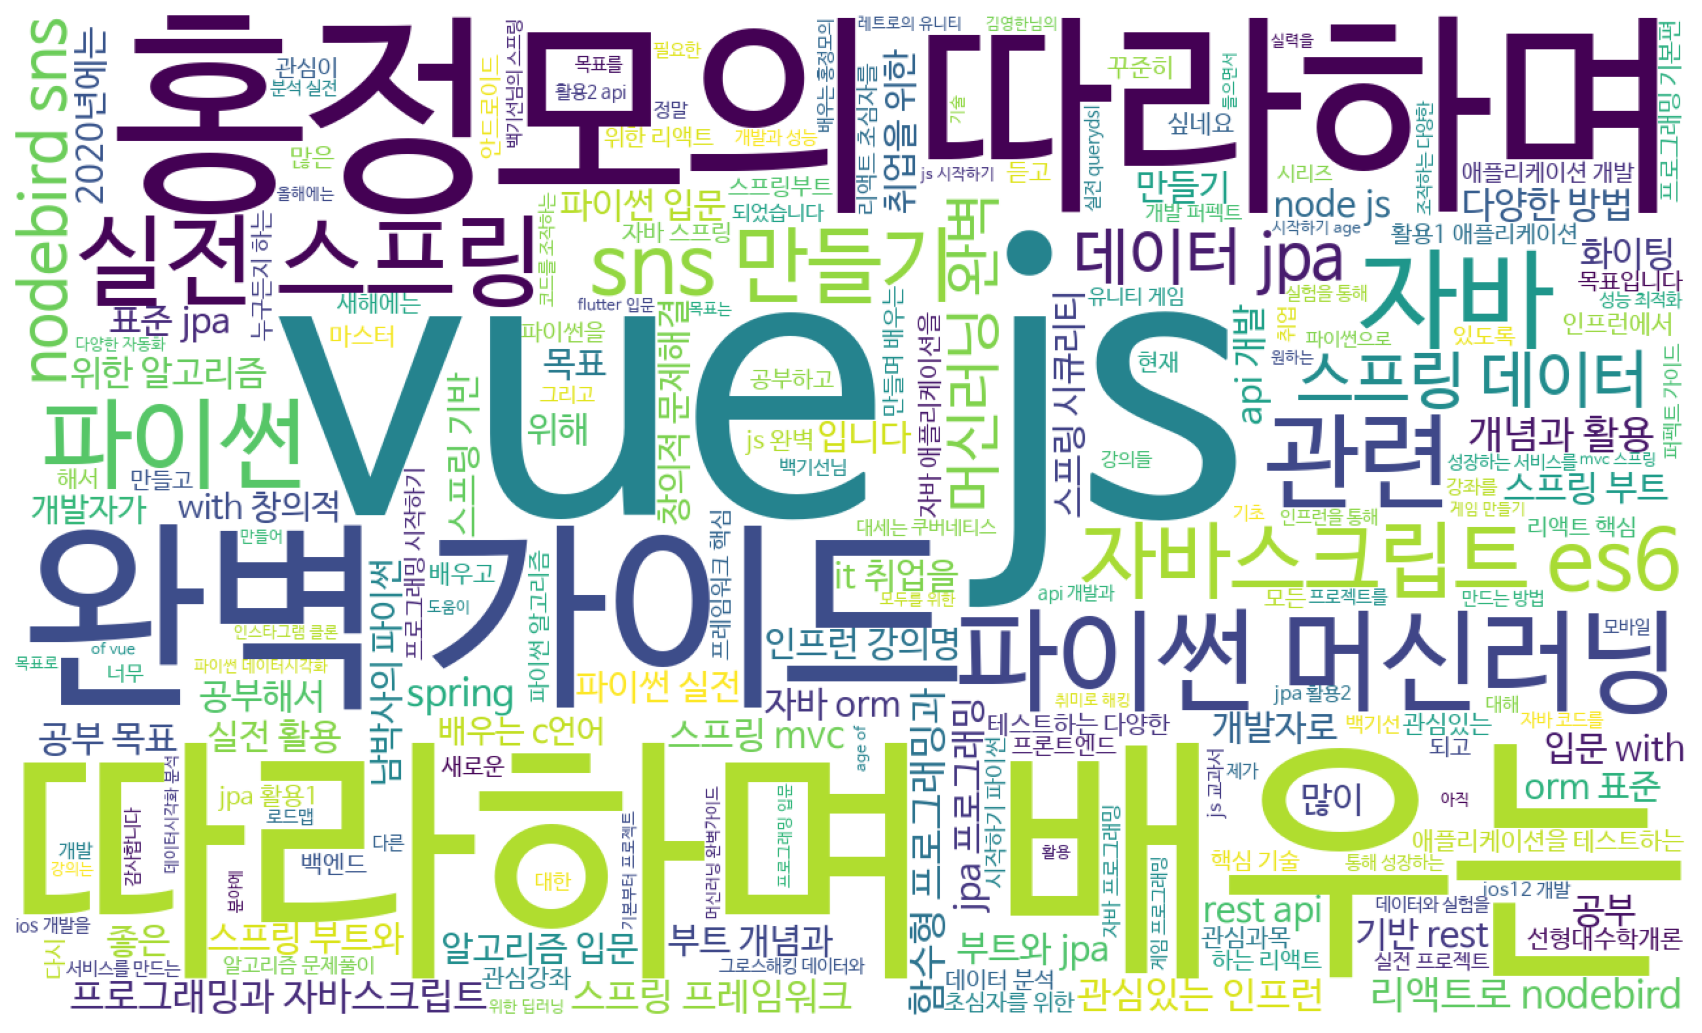

In [84]:
course_text = " ".join(df["course"])
displayWordCloud(course_text)